# Task 3: Juracan (Analyzing Storm Data)
### Part 4: Hannah Jensen

Instructions:  
 Part 4. RISK-PROFILE ANALYSIS (Part 1):
 
 A. Research and Identify potential natural factors influencing hurricane activity. Rank factors in order of perceived severity.
 1. Sea surface temperatures
 2. El Niño/La Niña patterns
 3. Atlantic Multidecadal Oscillation
 4. Saharan dust levels
 5. Upper-level wind patterns
 
 B. Perform spatial correlation analysis between identified factors and hurricane
 activity.

#### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sb

#### Loading in Data

In [3]:
city_coords_path = "C:/Users/craig/Documents/GitHub/analyzing-hurricane-trajectories/data/cities_with_coordinats.pkl"
city_coords_data = pd.read_pickle(city_coords_path)
city_coords_data.head()

,City Name,Country,Latitude,Longitude
0,New Orleans,USA,29.975998,-90.078213
1,Houston,USA,29.758938,-95.367697
2,Tampa,USA,27.947760,-82.458444
3,Miami,USA,25.774173,-80.193620
4,Corpus Christi,USA,27.763530,-97.403319


In [4]:
storm_path = "C:/Users/craig/Documents/GitHub/analyzing-hurricane-trajectories/data/storm_data.pkl"
storm_data = pd.read_pickle(storm_path)
storm_data.head()

,id,name,vmax,mslp,category,ace,start_time,end_time,start_lat,start_lon
year,,,,,,,,,,
1851,AL011851,UNNAMED,80,NaN,1,4.9,1851-06-25 00:00:00,1851-06-28 00:00:00,28.0,-94.8
1851,AL021851,UNNAMED,80,NaN,1,0.6,1851-07-05 12:00:00,1851-07-05 12:00:00,22.2,-97.6
1851,AL031851,UNNAMED,50,NaN,0,0.2,1851-07-10 12:00:00,1851-07-10 12:00:00,12.0,-60.0
1851,AL041851,UNNAMED,100,NaN,3,21.8,1851-08-16 00:00:00,1851-08-27 18:00:00,13.4,-48.0
1851,AL051851,UNNAMED,50,NaN,0,4.0,1851-09-13 00:00:00,1851-09-16 18:00:00,32.5,-73.5


In [19]:
d_storm_path = "C:/Users/craig/Documents/GitHub/analyzing-hurricane-trajectories/data/detailed_storm_data.pkl"
detailed_storm_data = pd.read_pickle(d_storm_path)
detailed_storm_data.head()

,idx,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin,storm_id,storm_name
0,0,1851-06-25 00:00:00,0,,HU,28.0,-94.8,80.0,NaN,north_atlantic,AL011851,UNNAMED
1,1,1851-06-25 06:00:00,0,,HU,28.0,-95.4,80.0,NaN,north_atlantic,AL011851,UNNAMED
2,2,1851-06-25 12:00:00,0,,HU,28.0,-96.0,80.0,NaN,north_atlantic,AL011851,UNNAMED
3,3,1851-06-25 18:00:00,0,,HU,28.1,-96.5,80.0,NaN,north_atlantic,AL011851,UNNAMED
4,4,1851-06-25 21:00:00,1,L,HU,28.2,-96.8,80.0,NaN,north_atlantic,AL011851,UNNAMED


In [6]:
d_storm_w_cities_path = "C:/Users/craig/Documents/GitHub/analyzing-hurricane-trajectories/data/detailed_storm_data_with_cities.pkl"
d_storm_w_cities_data = pd.read_pickle(d_storm_w_cities_path)
d_storm_w_cities_data.head()

,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin,storm_id,storm_name,Storm ID,Datetime,City,Distance (km)
0,1851-06-25 00:00:00,0,,HU,28.0,-94.8,80.0,NaN,north_atlantic,AL011851,UNNAMED,NaN,NaT,NaN,NaN
1,1851-06-25 06:00:00,0,,HU,28.0,-95.4,80.0,NaN,north_atlantic,AL011851,UNNAMED,NaN,NaT,NaN,NaN
2,1851-06-25 12:00:00,0,,HU,28.0,-96.0,80.0,NaN,north_atlantic,AL011851,UNNAMED,NaN,NaT,NaN,NaN
3,1851-06-25 18:00:00,0,,HU,28.1,-96.5,80.0,NaN,north_atlantic,AL011851,UNNAMED,AL011851,1851-06-25 18:00:00,Corpus Christi,96.307258
4,1851-06-25 21:00:00,1,L,HU,28.2,-96.8,80.0,NaN,north_atlantic,AL011851,UNNAMED,AL011851,1851-06-25 21:00:00,Corpus Christi,76.584748


#### Short Visual Analysis

In [7]:
# Sea Surface Temperature Data Source: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature
sea_surface_temp_path = "external data/sea-surface-temp_fig-1.csv"
sea_surf_temp_data = pd.read_csv(sea_surface_temp_path)
sea_surf_temp_data.head()

,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,1880,-0.418,-0.626,-0.210
1,1881,-0.330,-0.531,-0.128
2,1882,-0.344,-0.541,-0.146
3,1883,-0.459,-0.653,-0.265
4,1884,-0.589,-0.797,-0.381


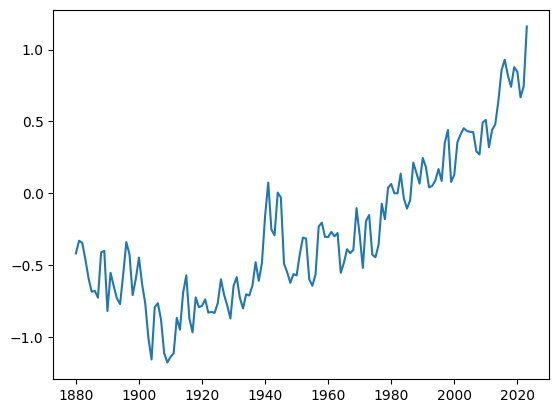

In [8]:
plt.plot(sea_surf_temp_data["Year"], sea_surf_temp_data["Annual anomaly"])

In [9]:
# https://ggweather.com/enso/oni.htm
elNino_laNina_path = "external data/el-nino-la-nina_fig-1.csv"
elNino_laNina_data = pd.read_csv(elNino_laNina_path)
elNino_laNina_data.head()

,Season,ENSO Type,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950-1951,ME,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951-1952,ME,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952-1953,WE,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953-1954,WE,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954-1955,WL,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [10]:
# https://psl.noaa.gov/data/timeseries/AMO/
AMO_path = "external data/amon-sm-long-data_fig-1.csv"
AMO_data = pd.read_csv(AMO_path)
AMO_data.head() # -99.99 represents missing data, "Atlantic Multidecadal Oscillation Index (Monthly)"

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1856,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1857,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1858,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
3,1859,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
4,1860,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99


In [21]:
df1 = pd.DataFrame(storm_data)
df2 = pd.DataFrame(sea_surf_temp_data.iloc[:,:2])
df3 = pd.DataFrame(elNino_laNina_data.iloc[:,:2])
df4 = pd.DataFrame(AMO_data)
print(len(df1))

df1['Year'] = (pd.to_datetime(df1['start_time']).dt.year).astype(int)
df1['Month'] = (pd.to_datetime(df1['start_time']).dt.month).astype(int)

df2["Year"] = (df2['Year']).astype(int)
df2.rename(columns={'Annual anomaly': 'X1'}, inplace=True)

df3["Year"] = (df3['Season'].str[:4]).astype(int)
df3 = df3.drop("Season", axis=1)
df3.rename(columns={'ENSO Type': 'X2'}, inplace=True)

df4 = pd.melt(df4, id_vars=['Year'], var_name='Month', value_name='AMO')
df4["Year"] = (df4['Year']).astype(int)
df4["Month"] = (df4['Month']).astype(int)
df4.rename(columns={'AMO': 'X3'}, inplace=True)


1988


In [22]:
merged_df_p1 = pd.merge(df1, df2, on="Year", how="left")
print(len(merged_df_p1))

1988


In [23]:
merged_df_p2 = pd.merge(merged_df_p1, df3, on="Year", how="left")
print(len(merged_df_p2))

1988


In [24]:
merged_df_p3 = pd.merge(merged_df_p2, df4, on=["Year", "Month"], how="left")

merged_df_p3['X3'] = merged_df_p3['X3'].replace(-99.99, np.nan)
df_cleaned = merged_df_p3.dropna(subset=['X1', 'X2', 'X3'], how='all')
print(df_cleaned.head())

          id     name  vmax  mslp  category   ace          start_time  \
60  AL011861  UNNAMED    90   NaN         2  12.8 1861-07-06 00:00:00   
61  AL021861  UNNAMED    80   NaN         1   8.0 1861-08-13 12:00:00   
62  AL031861  UNNAMED    90   NaN         2  16.7 1861-08-25 00:00:00   
63  AL041861  UNNAMED    70   NaN         1   0.5 1861-09-17 12:00:00   
64  AL051861  UNNAMED    70   NaN         1   2.2 1861-09-27 06:00:00   

              end_time  start_lat  start_lon  Year  Month  X1   X2     X3  
60 1861-07-12 18:00:00       15.1      -58.5  1861      7 NaN  NaN  0.059  
61 1861-08-17 18:00:00       20.5      -70.0  1861      8 NaN  NaN  0.059  
62 1861-08-30 18:00:00       34.4      -62.0  1861      8 NaN  NaN  0.059  
63 1861-09-17 12:00:00       28.5      -50.0  1861      9 NaN  NaN  0.059  
64 1861-09-28 12:00:00       28.5      -77.5  1861      9 NaN  NaN  0.059  


In [25]:
df = df_cleaned.copy() #df_cleaned.loc[:, ["vmax", "mslp", "X1", "X2", "X3"]]

#WE=Weak El Niño, ME=Moderate El Niño, SE=Strong El Niño, VSE=Very Strong El Niño WL=Weak La Niña, ML=Moderate La Niña, SL=Strong La Niña
factorize_X2 = {"WL":1, "ML":2, "SL":3, "WE":4, "ME":5, "SE":6, "VSE":7}
for key in factorize_X2.keys():
    df['X2'] = df['X2'].replace(key, factorize_X2[key])

for Xn in ["category", 'X1', 'X2', 'X3']:
    mean = df[Xn].mean()
    std_dev = df[Xn].std()
    df[Xn] = (df[Xn] - mean) / std_dev


C:\Users\craig\AppData\Local\Temp\ipykernel_12976\973305935.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['X2'] = df['X2'].replace(key, factorize_X2[key])


In [ ]:
# sb.pairplot(df)
# plt.show()

# df["vmax"] = np.log10(df["vmax"]) 
# df["mslp"] = np.sqrt(df["mslp"]) 

# df["X3"] = np.sqrt(df["X3"]**2) 

# sb.pairplot(df)

In [ ]:
# Working on the research right now